# PROJECT 01: REGULARIZATION

In this project, I use Engineering_graduate_salary.csv data from kaggle to predict salary of engineering graduate in India. I try to use Lasso Regression Model for feature selection and to find out wether the feature selection will improve my model performance or not. I also try to tuning the hyperparameter, scaling, and polynomial features, and then compare all of those scenario to find the best model that has smallest RMSE and smallest standard deviation (most stable). In the end, I choose the best scenario for the final model.

# Import Libraries

In [2203]:
# Import Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# PREPROCESSING
# Imputer
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
# Transformer/Encoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 
# Scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
# Power Transformer
from sklearn.preprocessing import PowerTransformer

# Modeling
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# Metric Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# TUNING
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV 

# 0. Load Dataset

In [2204]:
pd.options.display.max_columns = 100

In [2205]:
# Load Dataset
df = pd.read_csv('Engineering_graduate_salary.csv')
df

# 2998 rows × 34 columns

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,0,2005,73.00,0,1263,2,B.Tech/B.E.,electronics and communication engineering,70.00,1263,1,Tamil Nadu,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,state board,2008,77.00,state board,9481,2,B.Tech/B.E.,information technology,75.20,9481,0,Tamil Nadu,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,bsemp,2006,65.56,bsemp,547,2,B.Tech/B.E.,information technology,73.19,547,0,Madhya Pradesh,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,karnataka education board,2006,65.16,karnataka education board,1629,2,B.Tech/B.E.,computer engineering,74.81,1629,1,Karnataka,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [2206]:
# High School 
df.iloc[:,0:8].head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse


In [2207]:
# College
df.iloc[:,8:17].head()

,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear
0,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,Delhi,2013
1,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,Uttar Pradesh,2014
2,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,Maharashtra,2011
3,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,Delhi,2013
4,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,Tamil Nadu,2012


In [2208]:
# AMCAT test
df.iloc[:,17:28].head()

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1
1,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1
2,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1
3,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1
4,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1


In [2209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [2210]:
df.describe()

,ID,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,6.648926e+05,77.666264,2008.080720,74.341061,5210.210807,1.924616,71.509857,5210.210807,0.296197,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,3.648951e+05,10.002785,1.631814,11.120299,4776.609877,0.264053,8.122462,4776.609877,0.456655,36.780582,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,177.784536,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,1.124400e+04,43.000000,1998.000000,40.000000,2.000000,1.000000,6.630000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,3.334648e+05,71.140000,2007.000000,66.000000,526.250000,2.000000,66.530000,526.250000,0.000000,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,6.396945e+05,78.965000,2008.000000,74.000000,4027.500000,2.000000,71.800000,4027.500000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,9.951770e+05,85.600000,2009.000000,82.600000,8822.250000,2.000000,76.300000,8822.250000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,1.297877e+06,97.760000,2012.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [2211]:
df.describe(include='object')

,Gender,DOB,10board,12board,Degree,Specialization,CollegeState
count,2998,2998,2998,2998,2998,2998,2998
unique,2,1633,221,277,4,42,26
top,m,1991-07-03,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,2282,7,1026,1039,2757,670,698


# 1. Pre-Processing

Drop Columns
>- ID 
>- CollegeID (redundant with CollegeTier)
>- CollegeCityID (redundant with CollegeCityTier)


Outliers
>- graduation year (0): 1 row
>- sum() skill (0): 94 rows, didnt do any skill test at all
>- based on EDA, Graduates with salary > 800.000 rupee 
>- Degree=M.Sc., only 1 row

Change Value
>- DOB: get the year only

Missing Value
>- 10board ('0'): 256
>- 12board ('0'): 264
>- GraduationYear (0):1, median
>- Domain (-1): 179
>- ComputerProgramming (-1): 650
>- ElectronicsAndSemicon (-1): 2133
>- ComputerScience (-1): 2298
>- MechanicalEngg (-1): 2811
>- ElectricalEngg (-1): 2876
>- TelecomEngg (-1): 2744
>- CivilEngg (-1): 2972

Encoding
>- Gender: onehot
>- 10board: onehot/binary
>- 12board: onehot/binary
>- Degree: onehot
>- Specialization: onehot/binary
>- CollegeState: onehot/binary


## Load Dataset

In [2212]:
# Load Dataset
df = pd.read_csv('Engineering_graduate_salary.csv')
df.shape

(2998, 34)

## Handling Missing Value

In [2213]:
# Handling Missing Value 

df[['10board','12board']] = df[['10board','12board']].replace('0', np.NaN)

df[['GraduationYear']] = df[['GraduationYear']].replace(0, np.NaN)

df[['Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']] = df[['Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].replace(-1, 0)

## Drop Rows & Columns

In [2214]:
# Drop Rows (outliers)

sum_skills = df[['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']].sum(axis=1)

df['sum_skills'] = sum_skills
df.shape

(2998, 35)

In [2215]:
gradyear_outliers = df.loc[df['GraduationYear'].isna() == True] # drop Graduation Year outlier

df = df.drop(gradyear_outliers.index)
df.shape

(2997, 35)

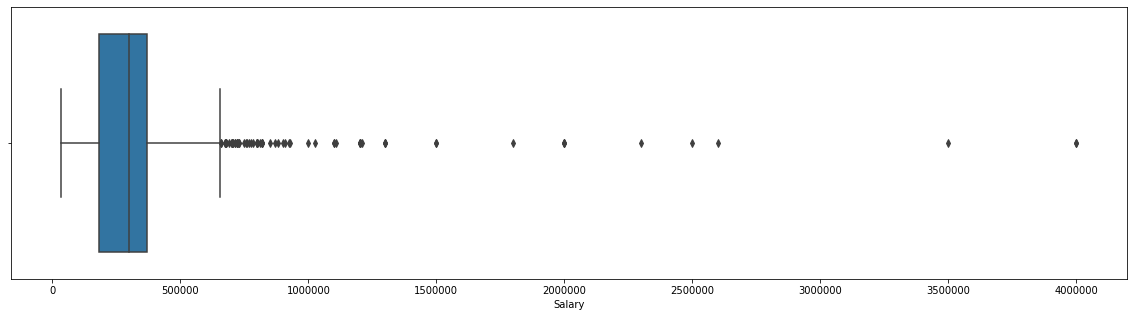

In [2216]:
plt.figure(figsize=(20,5))
sns.boxplot(df['Salary'])

In [2217]:
salary_outliers = df.loc[df['Salary']>800000] # drop Graduates with salary > 1 mil rupee

df = df.drop(salary_outliers.index)
df.shape

(2959, 35)

In [2218]:
# transform target
# power = PowerTransformer(method='box-cox')

# df['Salary_pow'] = power.fit_transform(np.array(df['Salary']).reshape(-1, 1))
# df['Salary_pow']

In [2219]:
# plt.figure(figsize=(20,5))
# sns.boxplot(df['Salary_pow'])

In [2220]:
skills_outliers = df.loc[df['sum_skills']==0] # drop who didnt do any skill test

df = df.drop(skills_outliers.index)
df.shape

(2865, 35)

In [2221]:
df['Degree'].value_counts()

B.Tech/B.E.      2640
MCA               188
M.Tech./M.E.       36
M.Sc. (Tech.)       1
Name: Degree, dtype: int64

In [2222]:
# drop row that has 'Degree']=='M.Sc. (Tech.)'
df = df.drop(df[df['Degree']=='M.Sc. (Tech.)'].index)

In [2223]:
df.isna().sum()

ID                         0
Gender                     0
DOB                        0
10percentage               0
10board                  244
12graduation               0
12percentage               0
12board                  252
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Salary                     0
sum_skills    

In [2224]:
# Drop Columns
df = df.drop(columns=['ID','sum_skills','CollegeID','CollegeCityID'])
df.shape

(2864, 31)

## Modify Value of Columns

In [2225]:
# Ubah DOB
df['DOB'] = [int(i.split('-')[0]) for i in df['DOB']]

df.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013.0,650,665,810,0.694479,485,366,0,0,0,0,0,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,1990,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014.0,440,435,210,0.342315,365,0,0,0,0,0,0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,2011.0,485,475,505,0.824666,0,400,0,0,0,260,0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,1991,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,1,Delhi,2013.0,675,620,635,0.990009,655,0,0,0,0,0,0,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,1990,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,1,Tamil Nadu,2012.0,575,495,365,0.278457,315,0,0,0,0,0,0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [2226]:
df.isna().sum()

Gender                     0
DOB                        0
10percentage               0
10board                  244
12graduation               0
12percentage               0
12board                  252
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness          0
agreeableness              0
extraversion               0
nueroticism                0
openess_to_experience      0
Salary                     0
dtype: int64

In [2227]:
df.columns, df.shape
# no columns ID, CollgeID, and CollegeCityID

(Index(['Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'Salary'],
      dtype='object'), (2864, 31))

## Column Transformer & Pipeline

In [2228]:
# pipeline imputer+binary
imputer_binary = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

# pipeline imputer+binary
imputer_onehot = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Transformer
transformer = ColumnTransformer([
    ('numeric', StandardScaler(), ['DOB', '10percentage', '12graduation',
        '12percentage', 'collegeGPA', 'GraduationYear',
        'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
        'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
        'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
        'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']),
    ('imputer_binary', imputer_binary, ['10board','12board']),
    ('onehot', OneHotEncoder(drop='first'), ['Gender','CollegeTier', 'Degree','CollegeCityTier']),
    ('binary', ce.BinaryEncoder(), ['Specialization','CollegeState'])
])


# 2. Split Dataset

In [2229]:
df.head(3)

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013.0,650,665,810,0.694479,485,366,0,0,0,0,0,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,m,1990,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014.0,440,435,210,0.342315,365,0,0,0,0,0,0,1.1336,0.0459,1.2396,0.5262,-0.2859,110000
2,m,1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,2011.0,485,475,505,0.824666,0,400,0,0,0,260,0,0.5100,-0.1232,1.5428,-0.2902,-0.2875,255000


In [2230]:
# Features and Label
X = df.drop(columns='Salary') 
y = df['Salary']

In [2231]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2232]:
X_train['Degree'].value_counts()

B.Tech/B.E.     2115
MCA              143
M.Tech./M.E.      33
Name: Degree, dtype: int64

In [2233]:
X_test['Degree'].value_counts()

B.Tech/B.E.     525
MCA              45
M.Tech./M.E.      3
Name: Degree, dtype: int64

# 3. Model Benchmark

### Choose best benchmark model

In [ ]:
# model
linreg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

# model pipeline
model_pipeline = Pipeline([
    ('transformer', transformer),
    ('model', enet)
])

# model options
hyperparam_models = {
    'model':[linreg, lasso, ridge, enet]
}

skfold=StratifiedKFold(n_splits=5)

# model grid search
model = GridSearchCV(
    estimator = model_pipeline,
    param_grid = hyperparam_models,
    cv = skfold,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1
)

# fitting model to train set
model.fit(X_train, y_train)

# show best model
model.best_params_

{'model': Ridge()}

In [ ]:
# chosen benchmark model: LinearRegression
model_benchmark = model.best_estimator_
model_benchmark

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['DOB', '10percentage',
                                                   '12graduation',
                                                   '12percentage', 'collegeGPA',
                                                   'GraduationYear', 'English',
                                                   'Logical', 'Quant', 'Domain',
                                                   'ComputerProgramming',
                                                   'ElectronicsAndSemicon',
                                                   'ComputerScience',
                                                   'MechanicalEngg',
                                                   'ElectricalEngg',
                                                   'TelecomEngg', 'CivilEngg',
                                                   'conscientiousne..

In [ ]:
gs_benchmark = pd.DataFrame(model.cv_results_)
gs_benchmark

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.387801,0.022569,0.095803,0.010570,LinearRegression(),{'model': LinearRegression()},-112544.200350,-115779.866845,-118895.796707,-112492.181037,-112046.530054,-114351.714998,2635.418360,2
1,0.399000,0.018556,0.103202,0.009682,Lasso(),{'model': Lasso()},-112542.922886,-115773.129924,-118911.989217,-112488.847952,-112046.785062,-114352.735008,2640.879425,3
2,0.366000,0.021006,0.085202,0.002786,Ridge(),{'model': Ridge()},-112534.245312,-115692.297322,-118870.377680,-112415.921724,-112039.718477,-114310.512103,2630.695900,1
3,0.352999,0.009958,0.084805,0.006489,ElasticNet(),{'model': ElasticNet()},-114593.124547,-114896.202245,-117742.146611,-113922.907778,-111947.158737,-114620.307983,1868.412532,4


In [ ]:
# RMSE Model Benchmark with cross val mean
rmse_model_benchmark_cv = ((gs_benchmark[gs_benchmark['rank_test_score']==1]['mean_test_score'])*-1).values[0]
print(rmse_model_benchmark_cv)

# RMSE Model Benchmark with cross val stdev
rmse_model_benchmark_cv_std = (gs_benchmark[gs_benchmark['rank_test_score']==1]['std_test_score']).values[0]
print(rmse_model_benchmark_cv_std)

114310.5121029738
2630.6958997534134


In [ ]:
# Predict to X_test (No need fitting)
y_pred = model.best_estimator_.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3263
RMSE      112983.5555


In [ ]:
# benchmark model
model_benchmark = model.best_estimator_

# fit train set
model_benchmark.fit(X_train, y_train)

# Predict to X_test
y_pred = model_benchmark.predict(X_test)

# Score
print('R square ', round( r2_score(y_test, y_pred), 4))
print('RMSE     ', round( mean_squared_error(y_test, y_pred, squared=False), 4))

R square  0.3263
RMSE      112983.5555


## RMSE

Model Benchmark cross val         
- 114310.512103

Model Benchmark predict test set  
- 112983.5555

# 3. Use Lasso for Feature Selection

In [ ]:
## model pipeline
model_lasso = Pipeline([
    ('transformer', transformer),
    ('model', lasso)
])

skfold = StratifiedKFold(n_splits=5)

cv_lasso = cross_val_score(model_lasso, X_train, y_train, cv=skfold, scoring='neg_root_mean_squared_error', error_score='raise')

print(cv_lasso)

rmse_model_lasso_cv = cv_lasso.mean()*-1
print('RMSE mean',rmse_model_lasso_cv)

rmse_model_lasso_cv_std = cv_lasso.std()
print('RMSE stdv', rmse_model_lasso_cv_std)

[-112542.92288623 -115773.12992369 -118911.98921742 -112488.84795203
 -112046.78506208]
RMSE mean 114352.73500828771
RMSE stdv 2640.879425087393


In [ ]:
## model pipeline
model_lasso = Pipeline([
    ('transformer', transformer),
    ('model', lasso)
])

# fit train set
model_lasso.fit(X_train, y_train)

# Predict to X_test
y_pred = model_lasso.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3257
RMSE      113036.1925


>## Manual feature selection

In [ ]:
# feature importance
coef = model_lasso.named_steps['model'].coef_

importance = np.abs(coef)
importance


array([ 4988.74557095, 14869.00057094,  2836.86571066, 13520.65233047,
       14634.45358949, 30539.49654935, 12590.81353665,  2857.66290674,
       20279.84431059,  9682.45197923,  9411.56526699,  5431.39490108,
        9577.31352138,   125.94972153,  2447.46453966,  1230.13367962,
       11650.11630145,  2820.55691168,  1720.36255003,  4308.60733114,
        2900.54421048,  2668.43161413,     0.        , 31652.86349645,
         557.03376639, 24696.6835025 ,  5823.91638521, 22144.34382367,
        7348.46798336, 12499.06422922,  6079.05956838,     0.        ,
       12371.83401169, 25869.57168287, 14877.73379513, 19970.31736975,
        6091.8363147 ,  5410.10764673,  9698.01557504,  3265.86142548,
       23711.72094664, 40985.69982281, 11845.56463492,  9452.11155649,
       13390.31218727,     0.        , 65248.76444708, 14733.88529668,
       10946.5073105 , 12438.1562404 ,  4390.29257508,  8312.41482231,
           0.        , 23447.04990733,  2816.49065808,  2440.54745442,
      

In [ ]:
# Get column names from ColumnTransformer
def get_column_names_from_columntransformer(column_transformer):    
    col_name = []
    for transformer_in_columns in column_transformer.transformers_[:]:#the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names()
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)
    return col_name

In [ ]:
# %pprint

In [ ]:
X_train.columns

Index(['Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [ ]:
# features after transformation
features = get_column_names_from_columntransformer(transformer)
features

['DOB', '10percentage', '12graduation', '12percentage', 'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', '0_0', '0_1', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '1_0', '1_1', '1_2', '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', 'x0_m', 'x1_2', 'x2_M.Tech./M.E.', 'x2_MCA', 'x3_1', 'Specialization_0', 'Specialization_1', 'Specialization_2', 'Specialization_3', 'Specialization_4', 'Specialization_5', 'Specialization_6', 'CollegeState_0', 'CollegeState_1', 'CollegeState_2', 'CollegeState_3', 'CollegeState_4', 'CollegeState_5']

In [ ]:
df_feature_imp = pd.DataFrame({
                            'feature':features,
                            'importance':importance
                            })

df_feature_imp.sort_values(by='importance', inplace=True)


In [ ]:
# Important Feature
df_feature_imp[df_feature_imp['importance']>0]

# Important Feature: 

,feature,importance
13,MechanicalEngg,125.949722
24,0_2,557.033766
15,TelecomEngg,1230.133680
18,agreeableness,1720.362550
55,CollegeState_3,2440.547454
14,ElectricalEngg,2447.464540
21,openess_to_experience,2668.431614
54,CollegeState_2,2816.490658
17,conscientiousness,2820.556912
2,12graduation,2836.865711


In [ ]:
# NOT Important Feature
df_feature_imp[df_feature_imp['importance']==0]

# NOT Important Features: 10board, 12Board, Specialization, CollegeState

,feature,importance
31,1_0,0.0
52,CollegeState_0,0.0
45,Specialization_0,0.0
22,0_0,0.0


Notes:
- 0: 10board
- 1: 12board
- x0: Gender 
- x1: CollegeTier
- x2: Degree 
- x3: CollegeCityTier

>## Feature selection with SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
model_withSelection = SelectFromModel(Lasso())

## model pipeline
model_ws = Pipeline([
    ('transformer', transformer),
    ('model', model_withSelection)
])

# fit train set
model_ws.fit(X_train, y_train)

# Visualising features that were kept by the lasso regularisation
model_ws.named_steps['model'].get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [ ]:
# Important Feature
selected_feature = np.array(features)[model_ws.named_steps['model'].get_support()]
selected_feature

array(['DOB', '10percentage', '12graduation', '12percentage',
       'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg',
       'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', '0_1',
       '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '1_1', '1_2',
       '1_3', '1_4', '1_5', '1_6', '1_7', '1_8', 'x0_m', 'x1_2',
       'x2_M.Tech./M.E.', 'x2_MCA', 'x3_1', 'Specialization_1',
       'Specialization_2', 'Specialization_3', 'Specialization_4',
       'Specialization_5', 'Specialization_6', 'CollegeState_1',
       'CollegeState_2', 'CollegeState_3', 'CollegeState_4',
       'CollegeState_5'], dtype='<U21')

In [ ]:
# NOT Important Feature
removed_feats = np.array(features)[(model_ws.named_steps['model'].estimator_.coef_ == 0).ravel().tolist()]
removed_feats

# NOT Important Features: 10board, 12Board, Specialization, CollegeState (hasilnya sama dengan cara manual)

array(['0_0', '1_0', 'Specialization_0', 'CollegeState_0'], dtype='<U21')

## Result:

same result shown by the two method above 

>## Model with Selected Features

In [ ]:
# (2878, 31)

In [ ]:
df2 = df.copy()
df2.head()

,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,1990,87.80,cbse,2009,84.00,cbse,1,B.Tech/B.E.,instrumentation and control engineering,73.82,1,Delhi,2013.0,650,665,810,0.694479,485,366,0,0,0,0,0,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,1990,57.00,cbse,2010,64.50,cbse,2,B.Tech/B.E.,computer science & engineering,65.00,0,Uttar Pradesh,2014.0,440,435,210,0.342315,365,0,0,0,0,0,0,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,1989,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,2,B.Tech/B.E.,electronics & telecommunications,61.94,0,Maharashtra,2011.0,485,475,505,0.824666,0,400,0,0,0,260,0,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,1991,84.30,cbse,2009,86.00,cbse,1,B.Tech/B.E.,computer science & engineering,80.40,1,Delhi,2013.0,675,620,635,0.990009,655,0,0,0,0,0,0,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,1990,82.00,cbse,2008,75.00,cbse,2,B.Tech/B.E.,biotechnology,64.30,1,Tamil Nadu,2012.0,575,495,365,0.278457,315,0,0,0,0,0,0,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [ ]:
df2.shape

(2864, 31)

## Preprocessing selected important feature

In [ ]:
df_feature_imp.sort_values(by='importance', ascending=False)

# not important features (imortance=0)
# 12board, Specialization, 10board, CollegeState

# we will choose top 10 features that not has imortance=0
# CollegeTier, GraduationYear, Gender, Quant, 10percentage, collegeGPA, 12percentage, CollegeCityTier, English, Degree

,feature,importance
46,Specialization_1,65248.764447
41,x1_2,40985.699823
23,0_1,31652.863496
5,GraduationYear,30539.496549
33,1_2,25869.571683
25,0_3,24696.683502
40,x0_m,23711.720947
53,CollegeState_1,23447.049907
27,0_5,22144.343824
8,Quant,20279.844311


In [ ]:
# NOT Important Features: 10board, 12Board, Specialization, CollegeState 

# we will choose top 10 features that not has imortance=0
# CollegeTier, GraduationYear, Gender, Quant, 10percentage, collegeGPA, 12percentage, CollegeCityTier, English, Degree

# pipeline imputer+binary
imputer_binary = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary', ce.BinaryEncoder())
])

# pipeline imputer+binary
imputer_onehot = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Transformer
transformer2 = ColumnTransformer([
    ('numeric', StandardScaler(), ['CollegeTier', 'GraduationYear', 'Quant', '10percentage', 'collegeGPA', '12percentage', 'CollegeCityTier', 'English']),
    ('onehot', OneHotEncoder(drop='first'), ['Gender', 'Degree'])
])

## Splitting Data

In [ ]:
X = df2[['CollegeTier', 'GraduationYear', 'Quant', '10percentage', 'collegeGPA', '12percentage', 'CollegeCityTier', 'English', 'Gender', 'Degree']]
y = df2[['Salary']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

In [ ]:
X['Degree'].value_counts()
# M.Sc. is only 1 row, better drop it to avoid error  

B.Tech/B.E.     2640
MCA              188
M.Tech./M.E.      36
Name: Degree, dtype: int64

## Model (with selected important features)

>### Cross Val

In [ ]:
## model pipeline
model_benchmark_imp = Pipeline([
    ('transformer', transformer2),
    ('model', ridge)
])

skfold = StratifiedKFold(n_splits=5) 

cv_model_imp = cross_val_score(model_benchmark_imp, X_train, y_train, cv=skfold, scoring='neg_root_mean_squared_error', error_score='raise')

print(cv_model)

rmse_model_imp_cv = cv_model_imp.mean()*-1
print('RMSE mean', cv_model_imp.mean()*-1)

rmse_model_imp_cv_std = cv_model_imp.std()
print('RMSE stdv', rmse_model_imp_cv_std)

[-112145.305294   -115732.60014881 -118950.74191706 -115737.22237758
 -116793.25455068]
RMSE mean 116019.84996040582
RMSE stdv 2266.533105191511


>### Predict test set

In [ ]:
## model pipeline
model_benchmark_imp = Pipeline([
    ('transformer', transformer2),
    ('model', ridge)
])

# fit train set
model_benchmark_imp.fit(X_train, y_train)

# Predict to X_test
y_pred = model_benchmark_imp.predict(X_test)

# Score
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))
print('MAE      ', round(mean_absolute_error(y_test, y_pred),4))
print('R square ', round(r2_score(y_test, y_pred),4))


RMSE      115569.1985
MAE       89766.7586
R square  0.2673


## RMSE after Feature Selection

- RMSE cross val:      115871.82485762444
- RMSE pred test set:  115010.9896

In [ ]:
list_model = ['Ridge Benchmark', 'Lasso all features', 'Ridge w FeatImp']
list_rmse = [rmse_model_benchmark_cv, rmse_model_lasso_cv, rmse_model_imp_cv]
list_rmse_std = [rmse_model_benchmark_cv_std, rmse_model_lasso_cv_std, rmse_model_imp_cv_std]
list_z = [(rmse_model_benchmark_cv_std/rmse_model_benchmark_cv),(rmse_model_lasso_cv_std/rmse_model_lasso_cv),(rmse_model_imp_cv_std/rmse_model_imp_cv)
]

pd.DataFrame({
    'Model': list_model,
    'RMSE mean': list_rmse,
    'RMSE stdv': list_rmse_std,
    'Stdv f Mean %': list_z
})

,Model,RMSE mean,RMSE stdv,Stdv f Mean %
0,Ridge Benchmark,114310.512103,2630.695900,0.023014
1,Lasso all features,114352.735008,2640.879425,0.023094
2,Ridge w FeatImp,116019.849960,2266.533105,0.019536


## Best Scenario: Ridge Benchmark

Best model is Ridge with all features (has smallest RMSE). We will use Ridge with all features


# 4. Hyperparameter Tuning

In [ ]:
# Features and Label
X = df.drop(columns='Salary') 
y = df['Salary']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# model
model_pipeline = Pipeline([
    ('transformer', transformer),
    ('model', ridge)
])

# model evaluation method
skfold = StratifiedKFold(n_splits=5) 

# grid
grid = dict()
# grid['model__alpha'] = np.logspace(-10, 10, 1000)
# grid['model__alpha'] = np.linspace(0, 1000, 1000)
grid['model__alpha'] = np.linspace(100, 200, 1000)


# gridsearch
random_search = RandomizedSearchCV(
    estimator=model_pipeline, 
    param_distributions=grid, 
    scoring='neg_root_mean_squared_error', 
    cv=skfold, 
    n_iter=30,
    n_jobs=-1,
    random_state=2020
    )

# perform tuning
random_search.fit(X_train, y_train)

# summarize
print('RMSE: %.3f' % random_search.best_score_)
print('Config: %s' % random_search.best_params_)

RMSE: -113709.857
Config: {'model__alpha': 148.64864864864865}


In [ ]:
df_randomsearch_result = pd.DataFrame(random_search.cv_results_).sort_values(by='rank_test_score').head()
df_randomsearch_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,0.341402,0.011535,0.098799,0.005307,148.649,{'model__alpha': 148.64864864864865},-112622.401657,-114582.056189,-117348.758245,-112281.538308,-111714.530285,-113709.856937,2059.432728,1
26,0.344201,0.013224,0.098802,0.010066,148.148,{'model__alpha': 148.14814814814815},-112621.033204,-114582.945499,-117349.939694,-112280.642657,-111714.851715,-113709.882554,2060.132157,2
15,0.334197,0.016677,0.100200,0.008751,147.848,{'model__alpha': 147.84784784784785},-112620.212780,-114583.481149,-117350.652248,-112280.105899,-111715.045507,-113709.899516,2060.553072,3
12,0.337603,0.018858,0.095397,0.003262,157.758,{'model__alpha': 157.75775775775776},-112647.523734,-114566.595442,-117328.541184,-112298.057206,-111709.006311,-113709.944775,2047.144843,4
18,0.339201,0.009663,0.093399,0.004718,157.858,{'model__alpha': 157.85785785785785},-112647.801886,-114566.432909,-117328.332005,-112298.240909,-111708.948905,-113709.951323,2047.014307,5


In [ ]:
rmse_model_tuning = df_randomsearch_result[df_randomsearch_result['rank_test_score']==1]['mean_test_score'].values[0]*-1
rmse_model_tuning

113709.85693684993

In [ ]:
rmse_model_tuning_std = df_randomsearch_result[df_randomsearch_result['rank_test_score']==1]['std_test_score'].values[0]
rmse_model_tuning_std

2059.4327277997577

In [ ]:
# [100000, 10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.000001, 0.0000001]

In [ ]:
# grid = dict()
# grid['alpha'] = np.logspace(-10, 10, 1000)
# grid

# 5. Apply Scaling
choose the best scaling method

In [ ]:
# scaler
scaler = StandardScaler()

# algo ridge
algo = Ridge(alpha = 148.64864864864865)

# mencari scaler terbaik
hyperparam_space = {
    'scaler': [None, StandardScaler(), RobustScaler()],
}

# model pipeline
model_pipeline = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('algo', algo)
])

# model random search
model_scaled = GridSearchCV(
    model_pipeline,
    hyperparam_space,
    cv=skfold,
    n_jobs=-1,
    scoring='neg_root_mean_squared_error'
)

# fitting model to train set
model_scaled.fit(X_train, y_train)

# best parameter
model_scaled.best_params_

{'scaler': None}

In [ ]:
df_scaled = pd.DataFrame(model_scaled.cv_results_)
df_scaled

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.550604,0.016105,0.141197,0.032820,None,{'scaler': None},-112622.401657,-114582.056189,-117348.758245,-112281.538308,-111714.530285,-113709.856937,2059.432728,1
1,0.423200,0.069867,0.096000,0.007127,StandardScaler(),{'scaler': StandardScaler()},-112623.572842,-115129.996166,-118034.076395,-112645.683310,-111400.414776,-113966.748698,2367.771281,3
2,0.395202,0.018127,0.087597,0.006118,RobustScaler(),{'scaler': RobustScaler()},-112718.864605,-114839.726752,-116933.560057,-112720.393797,-111589.962029,-113760.501448,1903.213115,2


In [ ]:
rmse_model_scaled = df_scaled[df_scaled['rank_test_score']==1]['mean_test_score'].values[0]*-1
rmse_model_scaled

113709.85693684993

In [ ]:
rmse_model_scaled_std = df_scaled[df_scaled['rank_test_score']==1]['std_test_score'].values[0]
rmse_model_scaled_std

2059.4327277997577

>## Try Model with Robust Scaler (most stable)

In [ ]:


# scaler
scaler = RobustScaler()

# algo ridge
algo = Ridge(alpha = 148.64864864864865)

# Model with RobustScaler
model_robust = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('algo', algo)
])

# fitting model to train set
model_robust.fit(X_train, y_train)

# cross validation
robust_cv = cross_val_score(model_robust, X_train, y_train, cv=skfold, scoring='neg_root_mean_squared_error')
robust_cv

array([-112718.86460505, -114839.72675245, -116933.56005746,
       -112720.39379687, -111589.962029  ])

In [ ]:
rmse_model_robust = robust_cv.mean()*-1
rmse_model_robust

113760.50144816823

In [ ]:
rmse_model_robust_std = robust_cv.std()
rmse_model_robust_std

1903.2131149598488

In [ ]:
# Predict to X_test
y_pred = model.best_estimator_.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3263
RMSE      112983.5555


### Note: Scaling with Robust Scaler improve model performance. So, we use Robust Scaler.

# 6. Polynomial Features
try polynomial features

In [ ]:
# polynomial feature
poly = PolynomialFeatures(degree=2)

# algo ridge
algo = Ridge(alpha = 148.64864864864865)

# model pipeline
model_poly = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('poly', poly),
    ('algo', algo)
])

# fitting model to train set
model_poly.fit(X_train, y_train)


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric', StandardScaler(),
                                                  ['DOB', '10percentage',
                                                   '12graduation',
                                                   '12percentage', 'collegeGPA',
                                                   'GraduationYear', 'English',
                                                   'Logical', 'Quant', 'Domain',
                                                   'ComputerProgramming',
                                                   'ElectronicsAndSemicon',
                                                   'ComputerScience',
                                                   'MechanicalEngg',
                                                   'ElectricalEngg',
                                                   'TelecomEngg', 'CivilEngg',
                                                   'conscientiousness',
    

In [ ]:
# cross validation
poly_cv = cross_val_score(model_poly, X_train, y_train, cv=skfold, scoring='neg_root_mean_squared_error')
poly_cv

array([-122682.07161216, -120399.54870284, -127846.1029905 ,
       -114460.04470604, -113671.27901695])

In [ ]:
rmse_model_poly_cv = poly_cv.mean()*-1
rmse_model_poly_cv

119811.8094056963

In [ ]:
rmse_model_poly_cv_std = poly_cv.std()
rmse_model_poly_cv_std

5281.689405440973

In [ ]:
# Predict to X_test
y_pred = model_poly.predict(X_test)

# Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.2059
RMSE      122666.6616


### Note: Polynomial Feature doesn't improve model performance. So we do not use polynomial features

>## Comparison of all scenario

In [ ]:
# All Result 

list_model = ['Ridge Benchmark', 'Lasso all features', 'Ridge w FeatImp', 'Ridge Tuning', 'Ridge RobustScaler', 'Ridge Polynomial']
list_rmse = [rmse_model_benchmark_cv, rmse_model_lasso_cv, rmse_model_imp_cv, rmse_model_tuning, rmse_model_robust, rmse_model_poly_cv]
list_rmse_std = [rmse_model_benchmark_cv_std, rmse_model_lasso_cv_std, rmse_model_imp_cv_std, rmse_model_tuning_std, rmse_model_robust_std, rmse_model_poly_cv_std]
list_z = [
    (rmse_model_benchmark_cv_std/rmse_model_benchmark_cv),
    (rmse_model_lasso_cv_std/rmse_model_lasso_cv),
    (rmse_model_imp_cv_std/rmse_model_imp_cv),
    (rmse_model_tuning_std/rmse_model_tuning),
    (rmse_model_robust_std/rmse_model_robust),
    (rmse_model_poly_cv_std/rmse_model_poly_cv)
]

pd.DataFrame({
    'Model': list_model,
    'RMSE mean': list_rmse,
    'RMSE stdv': list_rmse_std,
    'Stdv f Mean %': list_z
})

,Model,RMSE mean,RMSE stdv,Stdv f Mean %
0,Ridge Benchmark,114310.512103,2630.695900,0.023014
1,Lasso all features,114352.735008,2640.879425,0.023094
2,Ridge w FeatImp,116019.849960,2266.533105,0.019536
3,Ridge Tuning,113709.856937,2059.432728,0.018111
4,Ridge RobustScaler,113760.501448,1903.213115,0.016730
5,Ridge Polynomial,119811.809406,5281.689405,0.044083


# 7. Best Model & Save Model
this is the best model for this dataset

In [ ]:
# Features and Target
X = df.drop(columns='Salary') 
y = df['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)

>## Best Model

In [ ]:
# scaler
scaler = RobustScaler()

# algo ridge
algo = Ridge(alpha = 148.64864864864865)

# Model with RobustScaler
model_final = Pipeline([
    ('prep', transformer),
    ('scaler', scaler),
    ('algo', algo)
])

# fitting model to train set
model_final.fit(X_train, y_train)

# Predict to X_test
y_pred = model_final.predict(X_test)

# Final Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3157
RMSE      111690.4295


In [ ]:
# Predict to X_test
y_pred = model_final.predict(X_test)

# Final Score
print('R square ', round(r2_score(y_test, y_pred),4))
print('RMSE     ', round(mean_squared_error(y_test, y_pred, squared=False),4))

R square  0.3157
RMSE      111690.4295


## Save Model

In [ ]:
import pickle

In [ ]:
# pickle.dump(model_final, open('Final_ElasticNet.sav', 'wb'))

# Conclusion

- The best algorithm for this dataset is Ridge Regression with alpha = 148.64864864864865 and scaled with Robust Scaler
- Feature importance doesn't improve model performace
- Polynomial features doesn't improve model performace
- The best score I can get in predict test set is RMSE=111690.4295 and R square=0.3157

#
- The Final result is still not good enough, RMSE=111,690 of Salary average=305,174
- R square=0.3157, indicate the features we used is not explaining the Salary very well
- Need other features that has high correlation to Salary to improve the model performance
